## KNN Examples

Here we'll look at some examples and visualization of using the K nearest neighbors algorithm.

Let's start with the Iris dataset again  (which details some features of leaves and a label)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Given this dataset, we need to do some basic data cleaning to easily apply KNN.

In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

A commonly applied practice in ML is to randomly split our data into training and testing sets. While KNN is a non-parametric model, this is still good practice (when we test our model, our test points won't already be in the model).

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Another good practice, especially applicable to KNN, is to normalize our features. This factors into the evaluation of the Euclidean distances that will be a core component of the KNN algorithm - normalizing prevents features with larger ranges from overinfluencing the classification.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The KNN python notebook details an implentation from scratch, but as is the case often in practice, we'll use an out of the box method.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Now y_pred refers to the predicted labels from our KNN classifier with 5 neighbors carried out on the training set partition. We check the accuracy of this prediction by comparing to y_test.

In [0]:
print("Accuracy of KNN classifier with 5 neighbors:")
accuracy = np.count_nonzero(y_pred == y_test) / len(y_test)
accuracy = int(accuracy * 10000) / 100
print(accuracy, "% with", len(y_test), "test points")

Accuracy of KNN classifier with 5 neighbors:
90.0 % with 30 test points


Again we can easily use an out of the box method to check the results of our classifier.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  1  0]
 [ 0  7  2]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.91      0.90      0.90        30



The confusion matrix essentially describes the false positives/negatives and correct classifications into the labels. The left axis refers to true label while the right axis refers to labels our classifier outputted for the test points.Thus we can interpret the confusion matrix and see that two of the *versicolor* labelled test points were confused for *virginica*.

### Determining K

In the example above, we used k = 5 as the number of nearest neighbors to compare with. However, this k value is a **hyperparameter** - it isn't something determined by the algorithms but instead is something we set before the algorithm is run. It also has a very large influence on the accuracy of KNN.

Let's try some experiments and then interpret the results in terms of theory. In practice, the exact number used would be decided using a training and validation set, with the algorithm run on the training with different k values, and determining the best value for k based on scores on the validation set(s). Finally to evaluate the model it would be run on test set. (In the following we're effectively not carrying out the final testing step as it should never be used to determine the model / hyperparameters).

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

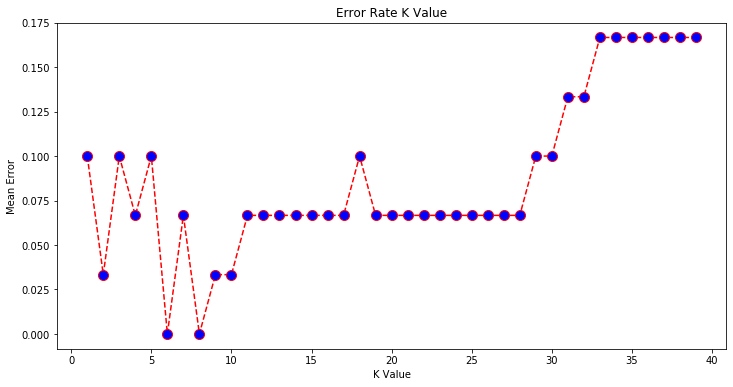

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

As we see above, there are a few K values that result in a 0 error. This is because our dataset is very neatly organized and simple and KNN is a fairly powerful classifier despite being so straightforward. However, even here we see some generalities of how different values for k can influence our classification.

First, consider low k. Starting with k = 1, we know that if the test point is in the training set, it would "find" itself and thus always be completely accurate. If it doesn't exist, it would just look for the closest point and use its label.

While this could be very accurate (especially if the test point already was used when training the model), outliers would not be mitigated at all in this approach, Increasing k would allow our model to be less sensitive to outliers.

Consider:


*   A region with several points with label 1
*   In it, an outlier with label 0
*   Increasing K forces a point placed in that region to look past that outlier and at the other K-1 nearest neighbors

However, if we keep increasing K and as we approach N (the number of points in the training data set), we end up overruling regions. At K = N, we assign every point the more frequent label in the training data set, which depending on the udnerlying distribution, could yield a very high error.

Such pitfalls can easily be avoided with a little bit of mindful selection and some validation to determine a good value for K.



Source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/